## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

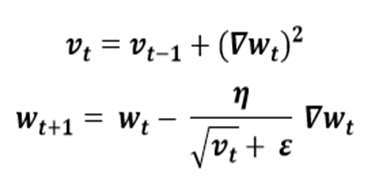

In [400]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [401]:
#objective function
def obj(x):
    return -x + 2
x = np.linspace(0,20)
y = obj(x)
print(y.shape)
print(y)
print(x.shape)
print(x)

(50,)
[  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.83673469
 -10.24489796 -10.65306122 -11.06122449 -11.46938776 -11.87755102
 -12.28571429 -12.69387755 -13.10204082 -13.51020408 -13.91836735
 -14.32653061 -14.73469388 -15.14285714 -15.55102041 -15.95918367
 -16.36734694 -16.7755102  -17.18367347 -17.59183673 -18.        ]
(50,)
[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449 

In [402]:
y = y.reshape((y.shape[0],1))
x = x.reshape((x.shape[0],1))
print(y.shape)
print(y)
print(x.shape)
print(x)

(50, 1)
[[  2.        ]
 [  1.59183673]
 [  1.18367347]
 [  0.7755102 ]
 [  0.36734694]
 [ -0.04081633]
 [ -0.44897959]
 [ -0.85714286]
 [ -1.26530612]
 [ -1.67346939]
 [ -2.08163265]
 [ -2.48979592]
 [ -2.89795918]
 [ -3.30612245]
 [ -3.71428571]
 [ -4.12244898]
 [ -4.53061224]
 [ -4.93877551]
 [ -5.34693878]
 [ -5.75510204]
 [ -6.16326531]
 [ -6.57142857]
 [ -6.97959184]
 [ -7.3877551 ]
 [ -7.79591837]
 [ -8.20408163]
 [ -8.6122449 ]
 [ -9.02040816]
 [ -9.42857143]
 [ -9.83673469]
 [-10.24489796]
 [-10.65306122]
 [-11.06122449]
 [-11.46938776]
 [-11.87755102]
 [-12.28571429]
 [-12.69387755]
 [-13.10204082]
 [-13.51020408]
 [-13.91836735]
 [-14.32653061]
 [-14.73469388]
 [-15.14285714]
 [-15.55102041]
 [-15.95918367]
 [-16.36734694]
 [-16.7755102 ]
 [-17.18367347]
 [-17.59183673]
 [-18.        ]]
(50, 1)
[[ 0.        ]
 [ 0.40816327]
 [ 0.81632653]
 [ 1.2244898 ]
 [ 1.63265306]
 [ 2.04081633]
 [ 2.44897959]
 [ 2.85714286]
 [ 3.26530612]
 [ 3.67346939]
 [ 4.08163265]
 [ 4.48979592]
 [ 

In [403]:
data = np.concatenate((x,y),axis=1)
np.random.shuffle(data)
print(data)

[[  9.3877551   -7.3877551 ]
 [  0.40816327   1.59183673]
 [ 12.65306122 -10.65306122]
 [ 17.55102041 -15.55102041]
 [ 15.10204082 -13.10204082]
 [  6.93877551  -4.93877551]
 [ 10.6122449   -8.6122449 ]
 [ 14.28571429 -12.28571429]
 [  8.97959184  -6.97959184]
 [ 13.87755102 -11.87755102]
 [  8.57142857  -6.57142857]
 [ 17.14285714 -15.14285714]
 [  5.30612245  -3.30612245]
 [ 16.32653061 -14.32653061]
 [  7.34693878  -5.34693878]
 [ 10.20408163  -8.20408163]
 [  1.63265306   0.36734694]
 [ 14.69387755 -12.69387755]
 [  5.71428571  -3.71428571]
 [  7.75510204  -5.75510204]
 [ 19.59183673 -17.59183673]
 [ 11.02040816  -9.02040816]
 [  2.44897959  -0.44897959]
 [  9.79591837  -7.79591837]
 [ 15.51020408 -13.51020408]
 [ 11.83673469  -9.83673469]
 [ 11.42857143  -9.42857143]
 [ 17.95918367 -15.95918367]
 [ 13.46938776 -11.46938776]
 [ 12.24489796 -10.24489796]
 [ 18.36734694 -16.36734694]
 [ 20.         -18.        ]
 [  3.67346939  -1.67346939]
 [ 16.73469388 -14.73469388]
 [  0.        

In [404]:
x = data[:,0]
y = data[:,1]
print(y.shape)
print(y)
print(x.shape)
print(x)

(50,)
[ -7.3877551    1.59183673 -10.65306122 -15.55102041 -13.10204082
  -4.93877551  -8.6122449  -12.28571429  -6.97959184 -11.87755102
  -6.57142857 -15.14285714  -3.30612245 -14.32653061  -5.34693878
  -8.20408163   0.36734694 -12.69387755  -3.71428571  -5.75510204
 -17.59183673  -9.02040816  -0.44897959  -7.79591837 -13.51020408
  -9.83673469  -9.42857143 -15.95918367 -11.46938776 -10.24489796
 -16.36734694 -18.          -1.67346939 -14.73469388   2.
  -1.26530612  -2.48979592  -0.85714286 -11.06122449 -17.18367347
  -4.53061224  -2.08163265  -6.16326531  -4.12244898  -0.04081633
 -13.91836735 -16.7755102    0.7755102    1.18367347  -2.89795918]
(50,)
[ 9.3877551   0.40816327 12.65306122 17.55102041 15.10204082  6.93877551
 10.6122449  14.28571429  8.97959184 13.87755102  8.57142857 17.14285714
  5.30612245 16.32653061  7.34693878 10.20408163  1.63265306 14.69387755
  5.71428571  7.75510204 19.59183673 11.02040816  2.44897959  9.79591837
 15.51020408 11.83673469 11.42857143 17.959

In [405]:
y = y.reshape((y.shape[0],1))
x = x.reshape((x.shape[0],1))
print(y.shape)
print(y)
print(x.shape)
print(x)

(50, 1)
[[ -7.3877551 ]
 [  1.59183673]
 [-10.65306122]
 [-15.55102041]
 [-13.10204082]
 [ -4.93877551]
 [ -8.6122449 ]
 [-12.28571429]
 [ -6.97959184]
 [-11.87755102]
 [ -6.57142857]
 [-15.14285714]
 [ -3.30612245]
 [-14.32653061]
 [ -5.34693878]
 [ -8.20408163]
 [  0.36734694]
 [-12.69387755]
 [ -3.71428571]
 [ -5.75510204]
 [-17.59183673]
 [ -9.02040816]
 [ -0.44897959]
 [ -7.79591837]
 [-13.51020408]
 [ -9.83673469]
 [ -9.42857143]
 [-15.95918367]
 [-11.46938776]
 [-10.24489796]
 [-16.36734694]
 [-18.        ]
 [ -1.67346939]
 [-14.73469388]
 [  2.        ]
 [ -1.26530612]
 [ -2.48979592]
 [ -0.85714286]
 [-11.06122449]
 [-17.18367347]
 [ -4.53061224]
 [ -2.08163265]
 [ -6.16326531]
 [ -4.12244898]
 [ -0.04081633]
 [-13.91836735]
 [-16.7755102 ]
 [  0.7755102 ]
 [  1.18367347]
 [ -2.89795918]]
(50, 1)
[[ 9.3877551 ]
 [ 0.40816327]
 [12.65306122]
 [17.55102041]
 [15.10204082]
 [ 6.93877551]
 [10.6122449 ]
 [14.28571429]
 [ 8.97959184]
 [13.87755102]
 [ 8.57142857]
 [17.14285714]
 [ 

In [406]:
x = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)
print(x.shape)
print(x)

(50, 2)
[[ 1.          9.3877551 ]
 [ 1.          0.40816327]
 [ 1.         12.65306122]
 [ 1.         17.55102041]
 [ 1.         15.10204082]
 [ 1.          6.93877551]
 [ 1.         10.6122449 ]
 [ 1.         14.28571429]
 [ 1.          8.97959184]
 [ 1.         13.87755102]
 [ 1.          8.57142857]
 [ 1.         17.14285714]
 [ 1.          5.30612245]
 [ 1.         16.32653061]
 [ 1.          7.34693878]
 [ 1.         10.20408163]
 [ 1.          1.63265306]
 [ 1.         14.69387755]
 [ 1.          5.71428571]
 [ 1.          7.75510204]
 [ 1.         19.59183673]
 [ 1.         11.02040816]
 [ 1.          2.44897959]
 [ 1.          9.79591837]
 [ 1.         15.51020408]
 [ 1.         11.83673469]
 [ 1.         11.42857143]
 [ 1.         17.95918367]
 [ 1.         13.46938776]
 [ 1.         12.24489796]
 [ 1.         18.36734694]
 [ 1.         20.        ]
 [ 1.          3.67346939]
 [ 1.         16.73469388]
 [ 1.          0.        ]
 [ 1.          3.26530612]
 [ 1.          4.489

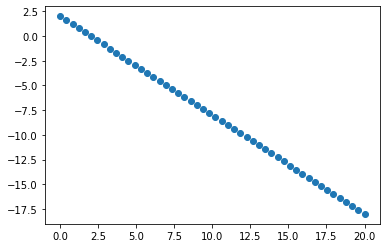

In [407]:
_ = plt.scatter(x[:,1],y)

In [408]:
# cost function
def cost(x, y, theta):
    # x(13,2) . theta(1,2) = h(13,1)
    h_x = x @ theta.T
    error = ((h_x - y).T @ (h_x - y))/2*x.shape[0]
    return error[0,0]

In [409]:
def grad (x, y, theta):
    # x(13,2) @ theta(1,2) = h(13,1)
    h_x = x @ theta.T
    # x(13,2) - h(13,1) = g(13,1)
    grad = x.T @ (h_x - y) / x.shape[0]
    return grad.T

In [410]:
def adagrad(x, y, it ,alpha, eps):
    theta_min = np.array([0,0])
    theta_min = theta.reshape((1,2))
    v_min = np.array([0,0])
    v_min = theta.reshape((1,2))
    pred = [x @ theta_min.T]
    vt = [v_min]
    thetas = [theta_min]             # a list of thetas (list of arrays (1,2))
    error = [cost(x, y, theta_min)]  # a list of output of cost function (list of values)
    for i in range(it):
        if (i>0 and abs(error[-1]-error[-2]) <= 1e-1):
            print(f"converages after {i} iteration")
            break
        grd = grad(x, y, theta_min)
        print(f"the grad = {grd}")
        v_min = v_min + grd**2
        adlr =  alpha / (np.sqrt(v_min) + eps)
        print(f"the adlr = {adlr}")
#       print(adlr)
        theta_min = theta_min - adlr * grd
#       print(f"theta_min[:,0] = {theta_min[:,0]}")
# #     theta_min[:,1] = theta_min - adlr[:,1] * grd[:,1]
#       print(f"theta_min[:,1] = {theta_min[:,1]}")
        print(f"v_min = {v_min}")
        error.append(cost(x, y, theta_min))
        vt.append(v_min)
        thetas.append(theta_min)
        pred.append(x @ theta_min.T)
    error.append(cost(x, y, theta_min))
    vt.append(v_min)
    thetas.append(theta_min)
    pred.append(x @ theta_min.T)
    return thetas, theta_min, error, pred, vt

In [411]:
# theta = np.array([0,.0])
# theta = theta.reshape((1,2))
# v = np.array([0,0])
# v = theta.reshape((1,2))
# print(np.array([1,1]).shape)
# print(theta)
# print(theta.shape)
# print(v)
# # print(.000001 / np.sqrt(v + 1e-12))

In [412]:
epochs = 300
alpha = 0.6
eps = 1e-11
thetas, theta_min, cost, pred, vt = adagrad(x, y, epochs, alpha, eps) 
# print(theta_min)
# print(thetas)
# print(vt)
print(cost[-1])
print(thetas[-1])

the grad = [[  8.         114.69387755]]
the adlr = [[0.075      0.00523132]]
v_min = [[   64.         13154.68554769]]
the grad = [[ 1.4        27.87755102]]
the adlr = [[0.07387729 0.00508331]]
v_min = [[   65.96       13931.84339858]]
the grad = [[-0.12053172  7.75575219]]
the adlr = [[0.07386915 0.00507238]]
v_min = [[   65.9745279  13991.99509066]]
the grad = [[-0.50502905  2.54591864]]
the adlr = [[0.07372678 0.0050712 ]]
v_min = [[   66.22958224 13998.4767924 ]]
the grad = [[-0.59690355  1.17924565]]
the adlr = [[0.07352926 0.00507095]]
v_min = [[   66.58587608 13999.86741269]]
the grad = [[-0.61281262  0.81268914]]
the adlr = [[0.07332278 0.00507083]]
v_min = [[   66.96141539 14000.52787632]]
the grad = [[-0.60908958  0.7069458 ]]
the adlr = [[0.07312051 0.00507074]]
v_min = [[   67.33240551 14001.02764869]]
the grad = [[-0.60040002  0.66947293]]
the adlr = [[0.07292555 0.00507066]]
v_min = [[   67.6928857  14001.47584269]]
the grad = [[-0.5905622   0.65007692]]
the adlr = [[0.

In [413]:
print(len(pred))
print(len(pred[-1]))

207
50


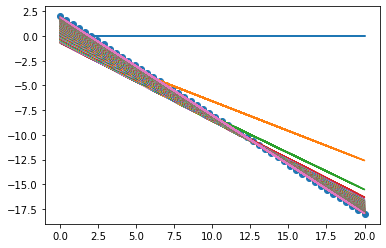

In [414]:
plt.scatter(x[:,1],y)
for i in  pred:
    plt.plot(x[:,1],i)

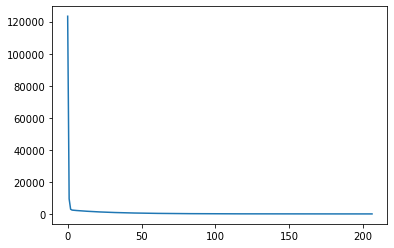

In [415]:
plt.plot(range(len(cost)),cost)  #range(len(cost)) is the number of iterations 

In [416]:
f = x @ theta_min.T
print(np.concatenate((f,y),axis=1))

[[ -7.41503071  -7.3877551 ]
 [  1.49944089   1.59183673]
 [-10.65665675 -10.65306122]
 [-15.5190958  -15.55102041]
 [-13.08787628 -13.10204082]
 [ -4.98381119  -4.93877551]
 [ -8.63064048  -8.6122449 ]
 [-12.27746977 -12.28571429]
 [ -7.00982746  -6.97959184]
 [-11.87226651 -11.87755102]
 [ -6.6046242   -6.57142857]
 [-15.11389255 -15.14285714]
 [ -3.36299817  -3.30612245]
 [-14.30348604 -14.32653061]
 [ -5.38901444  -5.34693878]
 [ -8.22543722  -8.20408163]
 [  0.28383112   0.36734694]
 [-12.68267302 -12.69387755]
 [ -3.76820142  -3.71428571]
 [ -5.79421769  -5.75510204]
 [-17.54511208 -17.59183673]
 [ -9.03584373  -9.02040816]
 [ -0.52657539  -0.44897959]
 [ -7.82023397  -7.79591837]
 [-13.49307953 -13.51020408]
 [ -9.84625024  -9.83673469]
 [ -9.44104699  -9.42857143]
 [-15.92429906 -15.95918367]
 [-11.46706326 -11.46938776]
 [-10.2514535  -10.24489796]
 [-16.32950231 -16.36734694]
 [-17.95031533 -18.        ]
 [ -1.74218515  -1.67346939]
 [-14.7086893  -14.73469388]
 [  1.90464414

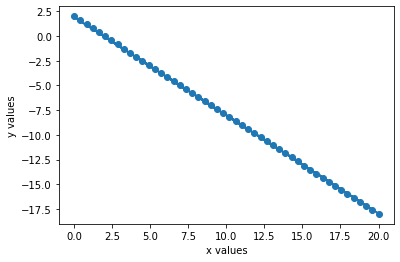

In [417]:
_ = plt.scatter(x[:,1],y)
_ = plt.xlabel('x values')
_ = plt.ylabel('y values')
_ = plt.plot(x[:,1],f)

Text(0, 0.5, 'Cost Value')

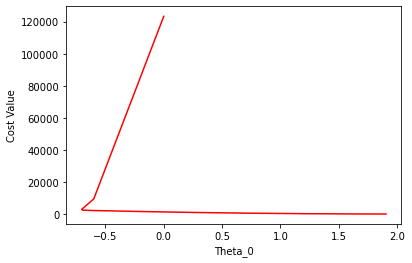

In [418]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,0], cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

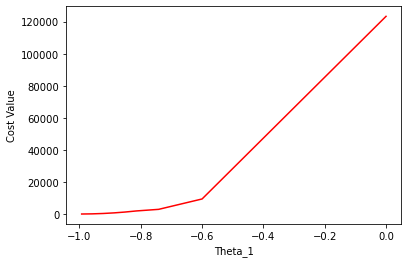

In [419]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,1], cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

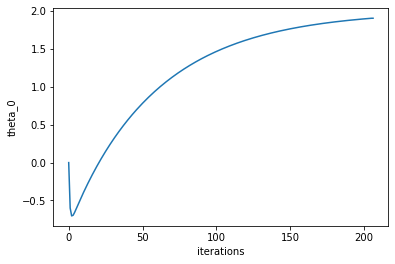

In [420]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(cost)),thetas[:,0])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_0')

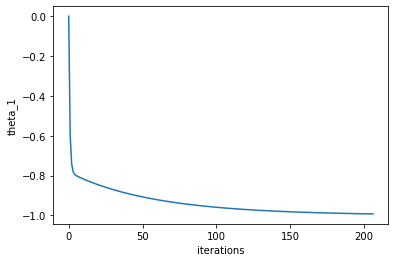

In [421]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(cost)),thetas[:,1])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_1')

In [422]:
from sklearn.metrics import r2_score
# print(theta.T)
# print(x)
f = x @ theta_min.T
print(r2_score(y , f))
# print(y)
# print(f)

0.9999323776698023


## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

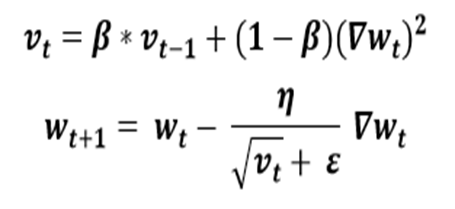

In [423]:
# cost function
def cost(x, y, theta):
    # x(13,2) . theta(1,2) = h(13,1)
    h_x = x @ theta.T
    error = ((h_x - y).T @ (h_x - y))/2*x.shape[0]
    return error[0,0]

In [424]:
def grad (x, y, theta):
    # x(13,2) @ theta(1,2) = h(13,1)
    h_x = x @ theta.T
    # x(13,2) - h(13,1) = g(13,1)
    grad = x.T @ (h_x - y) / x.shape[0]
    return grad.T

In [425]:
def RMSProp (x, y, it ,alpha, eps, beta):
    theta_min = np.array([0,0])
    theta_min = theta.reshape((1,2))
    v_min = np.array([0,0])
    v_min = theta.reshape((1,2))
    pred = [x @ theta_min.T]
    vt = [v_min]
    thetas = [theta_min]             # a list of thetas (list of arrays (1,2))
    error = [cost(x, y, theta_min)]  # a list of output of cost function (list of values)
    for i in range(it):
        if (i>0 and abs(error[-1]-error[-2]) <= 1e-1):
            print(f"converages after {i} iteration")
            break
        grd = grad(x, y, theta_min)
        ##################################################################
        v_min = v_min * beta + (1- beta) * (grd) ** 2
        adlr = alpha / (np.sqrt(v_min) + eps)
        theta_min = theta_min - adlr * grd
        ###################################################################
        error.append(cost(x, y, theta_min))
        vt.append(v_min)
        thetas.append(theta_min)
        pred.append(x @ theta_min.T)
    error.append(cost(x, y, theta_min))
    vt.append(v_min)
    thetas.append(theta_min)
    pred.append(x @ theta_min.T)
    return thetas, theta_min, error, pred, vt

In [426]:
epochs = 300
alpha = 0.1
eps = 1e-11
beta = .99
thetas, theta_min, cost, pred, vt = RMSProp(x, y, epochs ,alpha, eps, beta) 
print(theta_min)
# print(thetas)
print(cost[-1])
print(thetas[-1])

converages after 109 iteration
[[ 1.94492555 -0.99581291]]
0.9782213947453205
[[ 1.94492555 -0.99581291]]


In [427]:
print(len(pred))
print(len(pred[-1]))

111
50


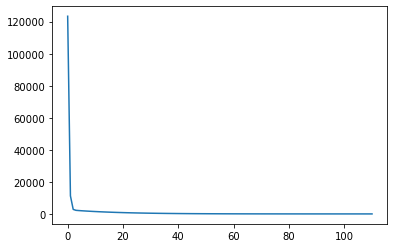

In [428]:
plt.plot(range(len(cost)),cost)  #range(len(cost)) is the number of iterations 

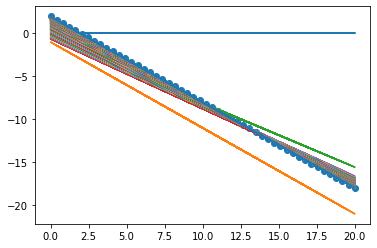

In [429]:
plt.scatter(x[:,1],y)
for i in  pred:
    plt.plot(x[:,1],i)

In [430]:
f = x @ theta_min.T
print(np.concatenate((f,y),axis=1))

[[ -7.40352215  -7.3877551 ]
 [  1.53847131   1.59183673]
 [-10.65515613 -10.65306122]
 [-15.5326071  -15.55102041]
 [-13.09388162 -13.10204082]
 [ -4.96479666  -4.93877551]
 [ -8.62288489  -8.6122449 ]
 [-12.28097312 -12.28571429]
 [ -6.9970679   -6.97959184]
 [-11.87451887 -11.87755102]
 [ -6.59061365  -6.57142857]
 [-15.12615285 -15.14285714]
 [ -3.33897967  -3.30612245]
 [-14.31324436 -14.32653061]
 [ -5.37125091  -5.34693878]
 [ -8.21643064  -8.20408163]
 [  0.31910856   0.36734694]
 [-12.68742737 -12.69387755]
 [ -3.74543392  -3.71428571]
 [ -5.77770515  -5.75510204]
 [-17.56487834 -17.59183673]
 [ -9.02933914  -9.02040816]
 [ -0.49379993  -0.44897959]
 [ -7.80997639  -7.79591837]
 [-13.50033586 -13.51020408]
 [ -9.84224763  -9.83673469]
 [ -9.43579339  -9.42857143]
 [-15.93906135 -15.95918367]
 [-11.46806462 -11.46938776]
 [-10.24870188 -10.24489796]
 [-16.3455156  -16.36734694]
 [-17.97133259 -18.        ]
 [ -1.71316268  -1.67346939]
 [-14.71969861 -14.73469388]
 [  1.94492555

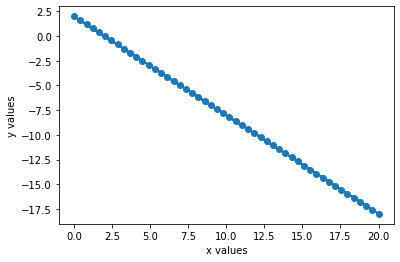

In [431]:
_ = plt.scatter(x[:,1],y)
_ = plt.xlabel('x values')
_ = plt.ylabel('y values')
_ = plt.plot(x[:,1],f)

Text(0, 0.5, 'Cost Value')

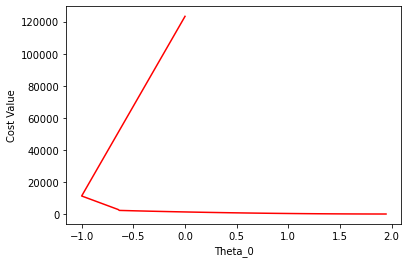

In [432]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,0], cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

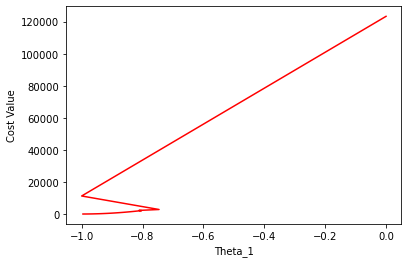

In [433]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,1], cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

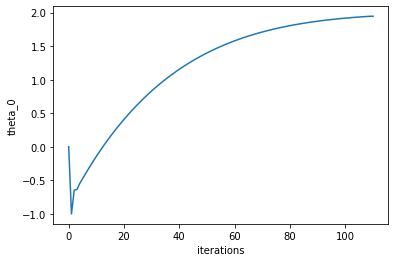

In [434]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(cost)),thetas[:,0])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_0')

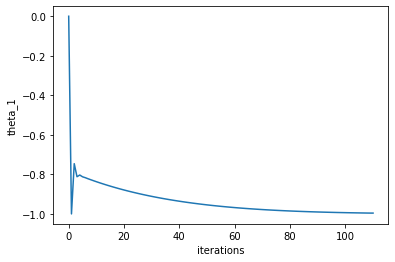

In [435]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(cost)),thetas[:,1])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_1')

In [436]:
from sklearn.metrics import r2_score
# print(theta.T)
# print(x)
f = x @ theta_min.T
print(r2_score(y , f))
# print(y)
# print(f)

0.9999774433654859


## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

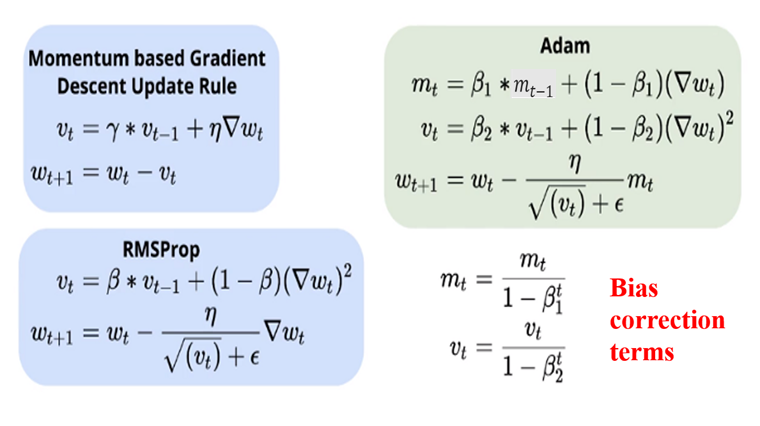

In [441]:
# cost function
def cost(x, y, theta):
    # x(13,2) . theta(1,2) = h(13,1)
    h_x = x @ theta.T
    error = ((h_x - y).T @ (h_x - y))/2*x.shape[0]
    return error[0,0]

In [442]:
def grad (x, y, theta):
    # x(13,2) @ theta(1,2) = h(13,1)
    h_x = x @ theta.T
    # x(13,2) - h(13,1) = g(13,1)
    grad = x.T @ (h_x - y) / x.shape[0]
    return grad.T

In [443]:
def Adam(x, y, it ,alpha, eps, beta1, beta2):
    theta_min = np.array([0,0])
    theta_min = theta.reshape((1,2))
    v_min = np.array([0,0])
    v_min = v_min.reshape((1,2))
    m_min = np.array([0,0])
    m_min = m_min.reshape((1,2))
    pred = [x @ theta_min.T]
    vt = [v_min]
    mt = [m_min]
    thetas = [theta_min]             # a list of thetas (list of arrays (1,2))
    error = [cost(x, y, theta_min)]  # a list of output of cost function (list of values)
    for i in range(it):
        grd = grad(x, y, theta_min)
        #######################################################################################
        m_min = m_min * beta1 + (1- beta1)*grd
        m_hat = m_min / (1- beta1**(i+1))
        v_min = v_min * beta2 + (1- beta2) * (grd)** 2
        v_hat = v_min / (1- beta2**(i+1))
        adlr = alpha / (np.sqrt(v_hat) + eps)
        theta_min = theta_min - adlr * m_hat
        ########################################################################################
        error.append(cost(x, y, theta_min))
        vt.append(v_min)
        mt.append(m_min)
        thetas.append(theta_min)
        pred.append(x @ theta_min.T)
        if (i>0 and abs(error[-1]-error[-2]) <= 1e-30):
            print(f"converages after {i} iteration")
            break
    return thetas, theta_min, error, pred, vt

In [444]:
epochs = 1000
alpha = .1
eps = 1e-8
beta1 = .6
beta2 = .88
thetas, theta_min, cost, pred, vt = Adam(x, y, epochs ,alpha, eps, beta1, beta2) 
print(theta_min)
# print(thetas)
print(cost[-1])
print(thetas[-1])

[[ 2.01210724 -0.98789276]]
28.528043676621014
[[ 2.01210724 -0.98789276]]


In [445]:
print(len(pred))
print(len(pred[-1]))

1001
50


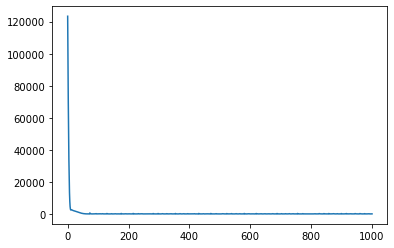

In [446]:
plt.plot(range(len(cost)),cost)  #range(len(cost)) is the number of iterations 

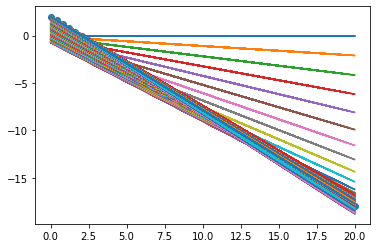

In [447]:
plt.scatter(x[:,1],y)
for i in  pred:
    plt.plot(x[:,1],i)

In [448]:
f = x @ theta_min.T
print(np.concatenate((f,y),axis=1))

[[-7.26198804e+00 -7.38775510e+00]
 [ 1.60888571e+00  1.59183673e+00]
 [-1.04877603e+01 -1.06530612e+01]
 [-1.53264187e+01 -1.55510204e+01]
 [-1.29070895e+01 -1.31020408e+01]
 [-4.84265883e+00 -4.93877551e+00]
 [-8.47165264e+00 -8.61224490e+00]
 [-1.21006464e+01 -1.22857143e+01]
 [-6.85876650e+00 -6.97959184e+00]
 [-1.16974249e+01 -1.18775510e+01]
 [-6.45554497e+00 -6.57142857e+00]
 [-1.49231972e+01 -1.51428571e+01]
 [-3.22977270e+00 -3.30612245e+00]
 [-1.41167541e+01 -1.43265306e+01]
 [-5.24588037e+00 -5.34693878e+00]
 [-8.06843111e+00 -8.20408163e+00]
 [ 3.99221106e-01  3.67346939e-01]
 [-1.25038680e+01 -1.26938776e+01]
 [-3.63299423e+00 -3.71428571e+00]
 [-5.64910190e+00 -5.75510204e+00]
 [-1.73425264e+01 -1.75918367e+01]
 [-8.87487417e+00 -9.02040816e+00]
 [-4.07221962e-01 -4.48979592e-01]
 [-7.66520957e+00 -7.79591837e+00]
 [-1.33103110e+01 -1.35102041e+01]
 [-9.68131724e+00 -9.83673469e+00]
 [-9.27809571e+00 -9.42857143e+00]
 [-1.57296402e+01 -1.59591837e+01]
 [-1.12942034e+01 -1

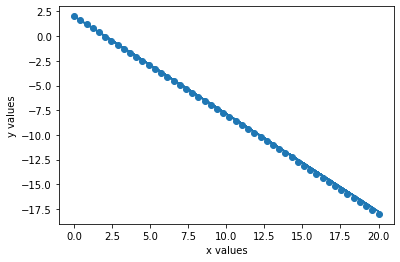

In [449]:
_ = plt.scatter(x[:,1],y)
_ = plt.xlabel('x values')
_ = plt.ylabel('y values')
_ = plt.plot(x[:,1],f)

Text(0, 0.5, 'Cost Value')

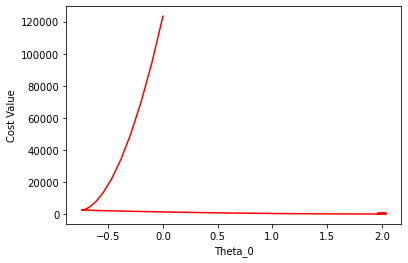

In [450]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,0], cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

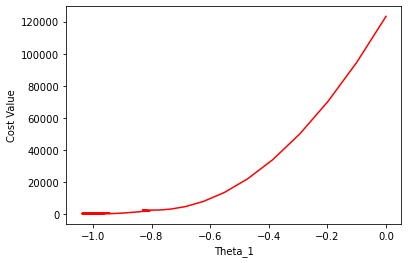

In [451]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,1], cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

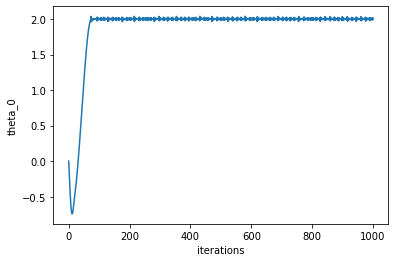

In [452]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(cost)),thetas[:,0])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_0')

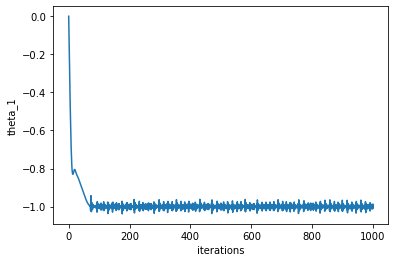

In [453]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(cost)),thetas[:,1])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_1')

In [454]:
from sklearn.metrics import r2_score
# print(theta.T)
# print(x)
f = x @ theta_min.T
print(r2_score(y , f))
# print(y)
# print(f)

0.9993421768752214


## Congratulations 
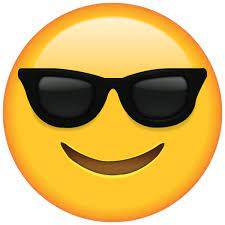